# This is the code notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pickle

from ode_system import ODESystem

 # Defining a scenario

In [3]:
scenario_name = input('please type scenario name: ')

In [4]:
# Duration
hidraulic_retention_period_days = 4
time = np.arange(0, hidraulic_retention_period_days, 0.6)

In [5]:
# algae
algae_initial_concentration = 10

In [6]:
# substrate
pet_initial_concentration = 10
mhet_initial_concentration = 0

In [7]:
# nutrients
amonium_concentration = 30900
nitrate_concentration = 400
phosphate_phosphorum_concentration = 119200

In [8]:
# enviroment
irradiance_superfitial = [134, 134, 134, 134, 134, 134, 134, 134]  # Ainda precisa ser definido, em miE/m2
temperature = [30, 28, 25, 26, 27, 28, 29, 30]   # graus celsius
medium_ph = 7.8  # pH
dissolved_o2 = 0
bicarbonate_concentration = 288
co2_concentration = 3000000  # falta, inventei valor super alto para que seja irrelevante

In [9]:
# putting it all togheter
petase_concentration, mhetase_concentration = [0,0]
dependents = [
    algae_initial_concentration,
    petase_concentration,
    mhetase_concentration,
    pet_initial_concentration,
    mhet_initial_concentration,
    ]
variable_independents = [
    irradiance_superfitial,
    temperature,
    ]
fixed_independents = [
    medium_ph,
    dissolved_o2,
    co2_concentration,
    bicarbonate_concentration,
    nitrate_concentration,
    amonium_concentration,
    phosphate_phosphorum_concentration,
    ]

ode_system = ODESystem()

results = solve_ivp(ode_system.ode_system, t_span=(0,hidraulic_retention_period_days), t_eval=time, y0=dependents, args=[variable_independents, fixed_independents])
algae_concentration, petase_concentration, mhetase_concentration, pet_concentration, mhet_concentration = results.y


In [10]:
# Save this model
args = [fixed_independents, variable_independents]
inputs = {'y0':dependents, 'args': args}
obj = {'inputs': inputs, 'model': results }
with open(f'scenarios/{scenario_name}.p', mode='wb') as file:
    pickle.dump(obj, file)

In [11]:
with open(f'scenarios/{scenario_name}.p', mode='rb') as file:
    system = pickle.load(file)
algae_concentration, petase_concentration, mhetase_concentration, pet_concentration, mhet_concentration = obj['model'].y
obj['inputs']['args']

[[7.8, 0, 3000000, 288, 400, 30900, 119200],
 [[134, 134, 134, 134, 134, 134, 134, 134], [30, 28, 25, 26, 27, 28, 29, 30]]]

In [12]:
### printing results
print(f"""
      algae concentration: {algae_concentration}\n 
      -----------\n petase concentration: {petase_concentration}\n
      ---------\n pet concentration: {pet_concentration}\n 
      ---------\n mhetase concentration: {mhetase_concentration}\n
      ---------\n mhet concentration: {mhet_concentration}\n
      """)


      algae concentration: [10.         10.05275445 10.10229214 10.14573102 10.18035179 10.21260676
 10.24799198]
 
      -----------
 petase concentration: [0.         0.03609485 0.07237483 0.10882322 0.14541459 0.18212092
 0.21895029]

      ---------
 pet concentration: [ 1.00000000e+01  9.63757359e+00  8.54775001e+00  6.72696084e+00
  4.17206226e+00  8.80540739e-01 -8.70547310e-05]
 
      ---------
 mhetase concentration: [0.         0.03609485 0.07237483 0.10882322 0.14541459 0.18212092
 0.21895029]

      ---------
 mhet concentration: [0. 0. 0. 0. 0. 0. 0.]

      


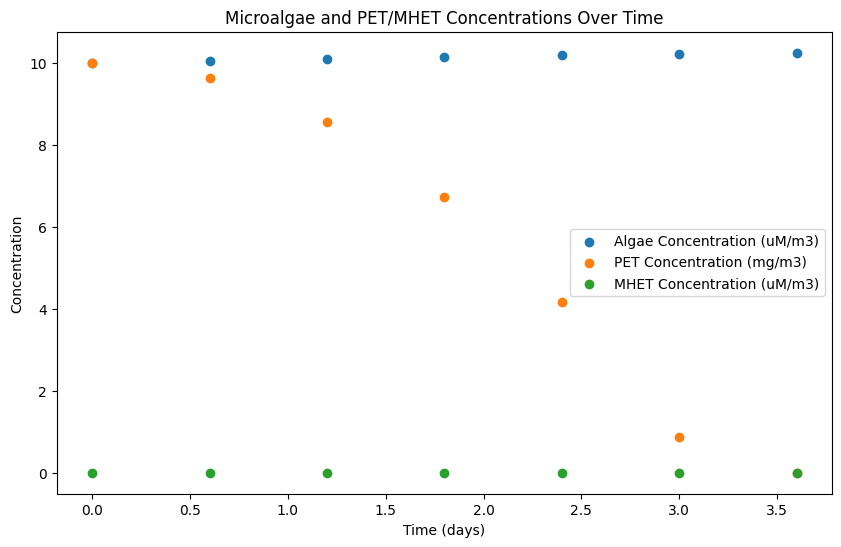

In [13]:
### ploting the results
plt.figure(figsize=(10, 6))
plt.scatter(time, algae_concentration, label='Algae Concentration (uM/m3)')
plt.scatter(time, pet_concentration, label='PET Concentration (mg/m3)')
plt.scatter(time, mhet_concentration, label='MHET Concentration (uM/m3)')
plt.xlabel('Time (days)')
plt.ylabel('Concentration')
plt.legend()
plt.title('Microalgae and PET/MHET Concentrations Over Time')
plt.show()